In [1]:
#libraries
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data acquisition from wikipedia 
wikiURL = "https://en.wikipedia.org/wiki/Anscombe%27s_quartet"
#read table from webpage
tables = pd.read_html(wikiURL)
#use second table from the actual dataset
anscombeDF = tables[1]
#rename columns for clarity
anscombeDF.columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
#melt dataframe for easier plotting
anscombeMelted = anscombeDF.melt(var_name="Group", value_name="Value")
#extract the x and y seperately based on column names
anscombeMelted["Type"] = anscombeMelted["Group"].str.extract(r'([xy])')
anscombeMelted["Group"] = anscombeMelted["Group"].str.extract(r'(\d)')
# Pivot table to get 'x' and 'y' in the correct format
anscombeReady = anscombeMelted.pivot_table(index=anscombeMelted.index, columns=["Type"], values="Value", aggfunc="first").reset_index()
anscombeReady.columns = ["Index", "x", "y"]
anscombeReady.drop(columns=["Index"], inplace=True)
#print dataframe to check
anscombeDF

,x1,y1,x2,y2,x3,y3,x4,y4
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [3]:
#data acquisition for global height data
#url is this so we will fetch global height data
url = "https://ncdrisc.org/downloads/bmi-height-2020/height/global/NCD_RisC_Lancet_2020_height_child_adolescent_global.csv"
#request the CSV file
response = requests.get(url)
#check if request was successful
if response.status_code == 200:
    print("Data successfully retrieved!")
else:
    print(f"Failed to retrieve data, status code: {response.status_code}")

#convert the response text into a DataFrame
df = pd.read_csv(StringIO(response.text))
#display basic info to check structure
#df.info()
#print(df.head())
#df
#filter relevant columns
#print(df.columns)
heightFiltered = df[["Sex", "Year", "Age group", "Mean height", "Mean height lower 95% uncertainty interval", "Mean height upper 95% uncertainty interval"]]
#select only 5-year-old children
height5YO = heightFiltered[heightFiltered["Age group"] == 5]
#print data
height5YO

Data successfully retrieved!


,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval
0,Boys,1985,5,105.649052,105.159635,106.172846
15,Boys,1986,5,105.708955,105.218835,106.230249
30,Boys,1987,5,105.769151,105.276081,106.289427
45,Boys,1988,5,105.826974,105.335396,106.344630
60,Boys,1989,5,105.883136,105.397650,106.392604
...,...,...,...,...,...,...
975,Girls,2015,5,108.962589,108.538889,109.399206
990,Girls,2016,5,109.112179,108.660052,109.573778
1005,Girls,2017,5,109.258769,108.768668,109.763695
1020,Girls,2018,5,109.402442,108.868471,109.951739


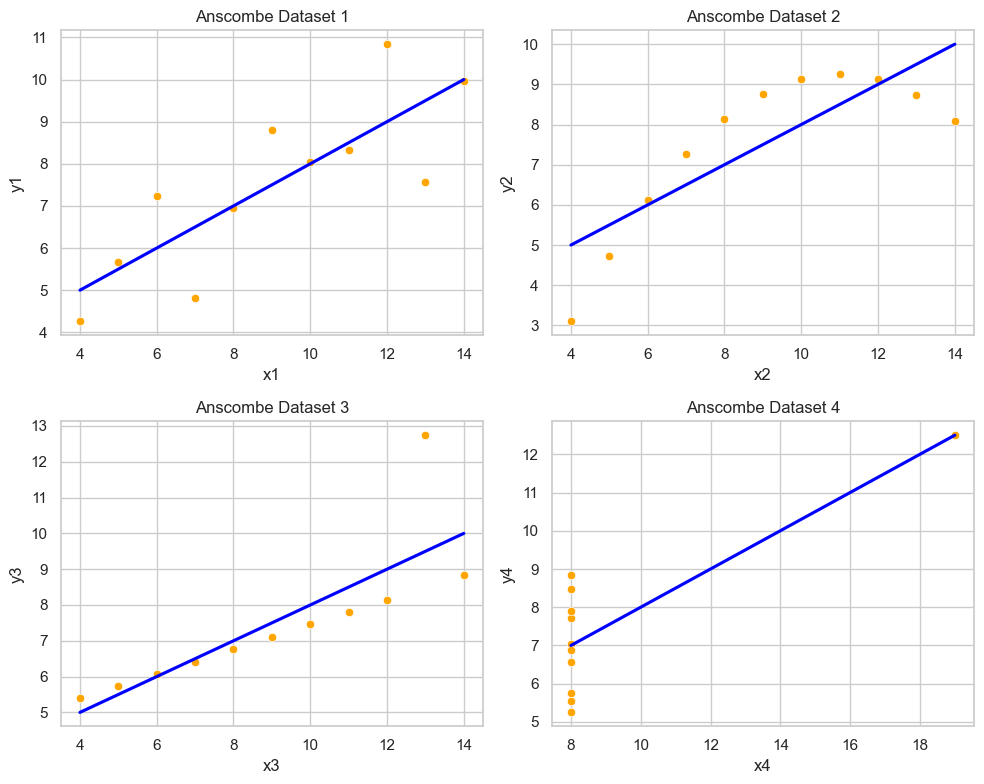

In [4]:
#the wiki plots 
#drop the first row which contains 'x', 'y' instead of numbers
anscombeDF = anscombeDF.iloc[1:].astype(float)
#creating the grid 
sns.set(style="whitegrid")

#define dataset names matching your column names
datasets = [("x1", "y1"), ("x2", "y2"), ("x3", "y3"), ("x4", "y4")]

#create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#loop through each dataset and plot in the correct subplot
for i, (x_col, y_col) in enumerate(datasets):
    ax = axes[i // 2, i % 2]  # Positioning in 2x2 grid
    
    #scatter plot
    sns.scatterplot(x=anscombeDF[x_col], y=anscombeDF[y_col], ax=ax, color="orange")

    #regression line
    sns.regplot(x=anscombeDF[x_col], y=anscombeDF[y_col], ax=ax, scatter=False, ci=None, color="blue")

    #title for each subplot
    ax.set_title(f"Anscombe Dataset {i+1}")

#plot
plt.tight_layout()
plt.show()


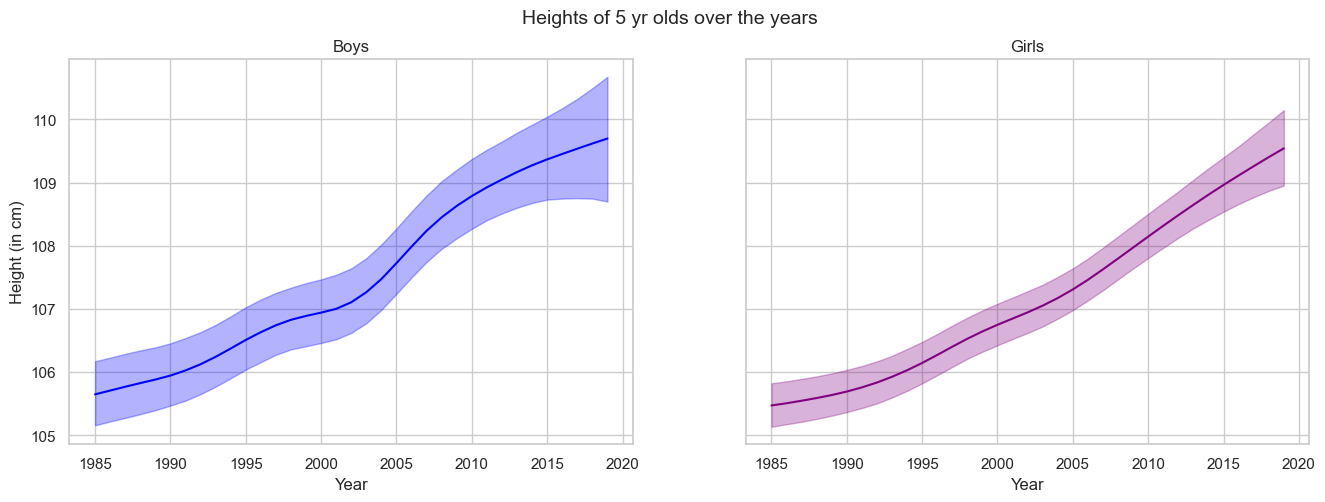

In [5]:
#data visualization for global heights 
#set style
sns.set(style="whitegrid")

#create subplots 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

#define genders and colors
genders = ["Boys", "Girls"]
colors = ["blue", "purple"]

#loop through boys and girls separately
for i, gender in enumerate(genders):
    subset = height5YO[height5YO["Sex"] == gender]

    #plot line for mean height
    axes[i].plot(subset["Year"], subset["Mean height"], label=f"{gender} (5 years old)", color=colors[i])

    #plot error bands
    axes[i].fill_between(subset["Year"], 
                         subset["Mean height lower 95% uncertainty interval"], 
                         subset["Mean height upper 95% uncertainty interval"], 
                         color=colors[i], alpha=0.3)

    #set labels and title
    axes[i].set_title(gender)
    axes[i].set_xlabel("Year")

#set common y-axis label
axes[0].set_ylabel("Height (in cm)")

#set overall title
fig.suptitle("Heights of 5 yr olds over the years", fontsize=14)

#show plot
plt.show()
